# Modeling Text Data


You can find the data here: https://data.boston.gov/dataset/vision-zero-entry

# Importing the necessary libraries

In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF
from sklearn.metrics import adjusted_rand_score

# Data Cleaning 

We loaded the data, visualized the class distribution. We also cleaned up the target labels, noting that some categories have been arbitrarily split and needed to be consolidated. 

In [6]:
data = pd.read_csv('Vision_Zero_Entry.csv')
data['REQUESTTYPE'] = data['REQUESTTYPE'].apply(lambda x : str(x))
data = data.loc[~data['COMMENTS'].isnull()]
data

,X,Y,OBJECTID,GLOBALID,REQUESTID,REQUESTTYPE,REQUESTDATE,STATUS,STREETSEGID,COMMENTS,USERTYPE
0,-71.071329,42.332161,15607,NaN,15607.0,bike facilities don't exist or need improvement,2016-01-19T22:14:26.000Z,Unassigned,0,the roadway is super wide here with no lane ma...,bikes
1,-71.067764,42.374244,15608,NaN,15608.0,"the wait for the ""Walk"" signal is too long",2016-01-19T22:55:29.000Z,Unassigned,0,As someone who walks from SE of the intersecti...,walks
2,-71.066077,42.374768,15609,NaN,15609.0,people cross away from the crosswalks,2016-01-19T22:57:09.000Z,Unassigned,0,I'm one of those people. Many people walk nort...,walks
4,-71.070658,42.351921,16008,NaN,16008.0,people don't yield while turning,2016-01-19T23:39:45.000Z,Unassigned,0,People do not understand which lane to move in...,drives
5,-71.059937,42.358693,16407,NaN,16407.0,people cross away from the crosswalks,2016-01-20T21:28:27.000Z,Unassigned,0,I rarely use the crosswalk because the light h...,walks
8,-71.093018,42.349864,13609,NaN,13609.0,bike facilities don't exist or need improvement,2016-01-15T21:46:24.000Z,Unassigned,0,"I feel scared biking on the ""green carpet"" bik...",bikes
9,-71.091526,42.349158,13610,NaN,13610.0,bike facilities don't exist or need improvement,2016-01-15T21:47:56.000Z,Unassigned,0,While I love that the Comm Ave bike lane is to...,bikes
10,-71.067408,42.352338,13611,NaN,13611.0,bike facilities don't exist or need improvement,2016-01-15T21:49:22.000Z,Unassigned,0,Need a bike facility to connect Boylston St to...,bikes
11,-71.069229,42.345068,13612,NaN,13612.0,people speed,2016-01-15T21:52:00.000Z,Unassigned,0,"3 lane, no parking either side. SPEEDWAY. No s...",walks
12,-71.077320,42.350091,13613,NaN,13613.0,people run red lights / stop signs,2016-01-15T21:54:47.000Z,Unassigned,0,People who are walking constantly run the red ...,bikes


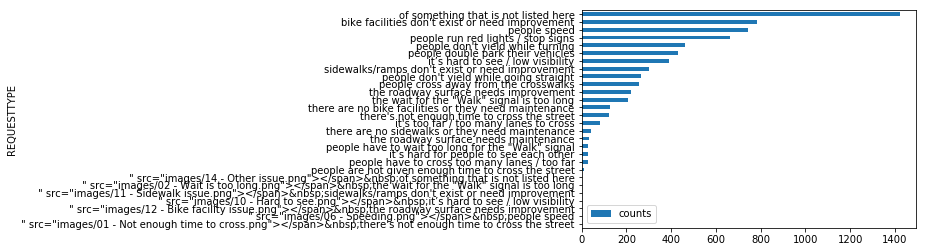

In [7]:
counts = pd.DataFrame(data.groupby(by='REQUESTTYPE').size().sort_values().rename('counts'))
counts.plot.barh(y='counts')

In [8]:
###Merging Relevant classes
classes = list(counts.index)
classes = [str(x) for x in classes]
classes


['" src="images/01 - Not enough time to cross.png"></span>&nbsp;there\'s not enough time to cross the street',
 '" src="images/06 - Speeding.png"></span>&nbsp;people speed',
 '" src="images/12 - Bike facility issue.png"></span>&nbsp;the roadway surface needs improvement',
 '" src="images/10 - Hard to see.png"></span>&nbsp;it’s hard to see / low visibility',
 '" src="images/11 - Sidewalk issue.png"></span>&nbsp;sidewalks/ramps don\'t exist or need improvement',
 '" src="images/02 - Wait is too long.png"></span>&nbsp;the wait for the "Walk" signal is too long',
 '" src="images/14 - Other issue.png"></span>&nbsp;of something that is not listed here',
 'people are not given enough time to cross the street',
 'people have to cross too many lanes / too far',
 'it’s hard for people to see each other',
 'people have to wait too long for the "Walk" signal',
 'the roadway surface needs maintenance',
 'there are no sidewalks or they need maintenance',
 "it's too far / too many lanes to cross",
 "

In [9]:
classes_map = {classes[0]:classes[14], classes[1]:classes[25], classes[2]:classes[26], classes[3]:classes[21]
              , classes[4]:classes[20], classes[5]:classes[16], classes[6]:classes[27], classes[9]:classes[21]
              , classes[7]:classes[14], classes[8]:classes[13], classes[10]:classes[16], classes[11]:classes[17]
              , classes[12]: classes[20], classes[15]: classes[26], classes[19] : classes[23]}

data_clean = data.copy()
data_clean['REQUESTTYPE'] = data['REQUESTTYPE'].replace(classes_map)

classes_map,len(classes_map.keys()), len(set(data['REQUESTTYPE'])), len(set(data_clean['REQUESTTYPE']))
#keys = list(classes_map.keys())

#data_clean['REQUESTTYPE'][data_clean['REQUESTTYPE'].isin(keys)]


({'" src="images/01 - Not enough time to cross.png"></span>&nbsp;there\'s not enough time to cross the street': "there's not enough time to cross the street",
  '" src="images/02 - Wait is too long.png"></span>&nbsp;the wait for the "Walk" signal is too long': 'the wait for the "Walk" signal is too long',
  '" src="images/06 - Speeding.png"></span>&nbsp;people speed': 'people speed',
  '" src="images/10 - Hard to see.png"></span>&nbsp;it’s hard to see / low visibility': 'it’s hard to see / low visibility',
  '" src="images/11 - Sidewalk issue.png"></span>&nbsp;sidewalks/ramps don\'t exist or need improvement': "sidewalks/ramps don't exist or need improvement",
  '" src="images/12 - Bike facility issue.png"></span>&nbsp;the roadway surface needs improvement': "bike facilities don't exist or need improvement",
  '" src="images/14 - Other issue.png"></span>&nbsp;of something that is not listed here': 'of something that is not listed here',
  'it’s hard for people to see each other': 'it’s

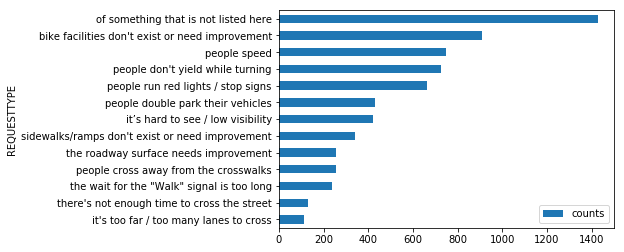

In [10]:
counts_cleaned = pd.DataFrame(data_clean.groupby(by='REQUESTTYPE').size().sort_values().rename('counts'))
counts_cleaned.plot.barh(y='counts')

# Model 1 

We runed a logistic regression model using a bag-of-word approach and visualize the confusion matrix

In [11]:
# Add your code for task 2 here. You may use multiple cells. 

In [12]:
y = data_clean['REQUESTTYPE']
le = LabelEncoder()
y = le.fit_transform(y)
X = list(data_clean['COMMENTS'])
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y)
vect = CountVectorizer()
logit = LogisticRegressionCV()
pipe= Pipeline([('vect', vect) , ('logit', logit)])
pipe.fit(X_train, y_train)
y_hat = pipe.predict(X_test)
score = f1_score(y_test, y_hat, average='macro')
#scores = cross_val_score(pipe, X, y, cv=5, scoring='f1_macro' )




In [13]:
score

0.55098123156790879

We then plotting the important words for each class according to the model .....

In [16]:
def plot_important_features(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(coef)
    low = inds[:top_n]
    high = inds[-top_n:]
    important = np.hstack([low, high])
    myrange = range(len(important))

    ax.bar(myrange, coef[important])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[important], rotation=60, ha="right")

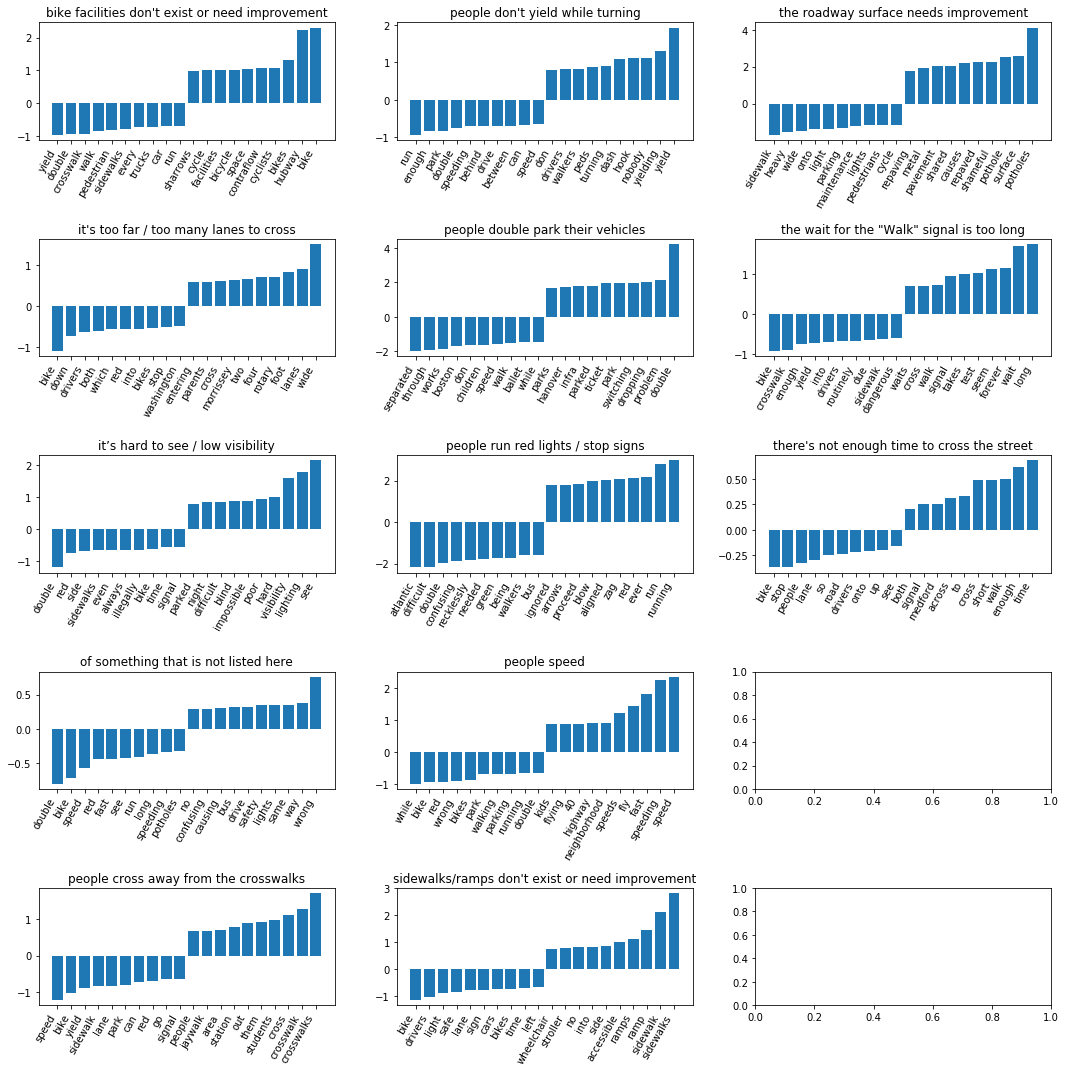

In [20]:
w = pipe.named_steps['logit'].coef_
#w.shape
features = pipe.named_steps['vect'].get_feature_names()
fig, axarr = plt.subplots(5,3, figsize=(15,15))
for i in range(w.shape[0]):
    plot_important_features(w[i,:].ravel(), np.array(features), top_n=10, ax=axarr[i%5,i//5])
    axarr[i%5,i//5].set_title(le.inverse_transform(i))
fig.tight_layout()
#plt.figure(figsize=(10, 10))
#plt.barh(np.arange(len(F)), np.log(F + 1))
#plt.yticks(np.arange(len(F)), map(lambda x: feature_mapping[x], data_nr.columns));

... and the confusion matrix

In [21]:
y_test_names = le.inverse_transform(y_test)
y_hat_names = le.inverse_transform(y_hat)
labels = le.inverse_transform(range(13))
conf = confusion_matrix(y_test_names, y_hat_names, labels)
labels, conf

(array(["bike facilities don't exist or need improvement",
        "it's too far / too many lanes to cross",
        'it’s hard to see / low visibility',
        'of something that is not listed here',
        'people cross away from the crosswalks',
        "people don't yield while turning",
        'people double park their vehicles',
        'people run red lights / stop signs', 'people speed',
        "sidewalks/ramps don't exist or need improvement",
        'the roadway surface needs improvement',
        'the wait for the "Walk" signal is too long',
        "there's not enough time to cross the street"], dtype=object),
 array([[177,   1,   0,  31,   1,   4,   3,   1,   5,   2,   3,   0,   0],
        [  0,   2,   0,  15,   1,   3,   0,   0,   5,   1,   0,   1,   0],
        [  3,   0,  64,  15,   0,   7,   3,   3,  10,   0,   0,   0,   0],
        [ 28,   0,  10, 201,  13,  25,  14,  25,  17,  18,   3,   3,   0],
        [  1,   0,   2,  26,  22,   3,   0,   2,   2,   4,   0,  

We see that a lot of mistakes are made by wrongly assigning elements to the class others. This might be because the class other is in fact some sort of mixture of the other classes and is so big. This idea is partilly confirmed by the analysis of the most important features of the class others.

# Model 2 

We then tried to improve the model using more complex text features like n-grams, character n-grams or Tfidf Vectorizer.

In [22]:
# Add your code for task 3 here. You may use multiple cells. 

In [23]:
###Tfidf
y = data_clean['REQUESTTYPE']
le = LabelEncoder()
y = le.fit_transform(y)
X = list(data_clean['COMMENTS'])
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y)
vect = TfidfVectorizer()
logit = LogisticRegressionCV()
pipe= Pipeline([('vect', vect) , ('logit', logit)])
pipe.fit(X_train, y_train)
y_hat = pipe.predict(X_test)
score = f1_score(y_test, y_hat, average='macro')

C:\Users\oser\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [24]:
C = pipe.named_steps['logit'].C_
score, C

(0.56940182002989892,
 array([  2.15443469e+01,   1.00000000e-04,   2.15443469e+01,
          2.78255940e+00,   2.15443469e+01,   2.78255940e+00,
          2.15443469e+01,   2.15443469e+01,   2.15443469e+01,
          2.15443469e+01,   1.00000000e+04,   2.15443469e+01,
          1.66810054e+02]))

In [25]:
y = data_clean['REQUESTTYPE']
le = LabelEncoder()
y = le.fit_transform(y)
X = list(data_clean['COMMENTS'])
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y)

In [26]:
vect = CountVectorizer(ngram_range = (1,5), min_df=2)
vect_char = CountVectorizer(ngram_range = (1,5), min_df=2, analyzer= 'char')
norm = Normalizer()
tfidf = TfidfTransformer()
logit = LogisticRegression(C=C.mean())
forest = RandomForestClassifier()
pipe = Pipeline([('vect', vect_char) , ('norm', norm), ('tfidf', tfidf), ('logit', logit)])
param_grid = {'vect__ngram_range' : [(1,1), (1,2), (1,5), (1,7), (2,3), (2,5), (5,5)  ]\
               #,'vect__min_df' : [1,2,3] \
               #'norm' : [None, norm] \
               #,'tfidf' : [None, tfidf]
                #'forest__n_estimators' : [10, 50, 10, 500] \
                #,'forest__max_depth': range(1,10)
             }

#grid = GridSearchCV(pipe, param_grid, cv=10, scoring='f1_macro')
#grid.fit(X_train, y_train)


In [ ]:
grid.best_params_, grid.best_score_

In [20]:
vect = CountVectorizer(ngram_range = (1,5), min_df=2)
norm = Normalizer()
tfidf = TfidfTransformer()
logit = LogisticRegression(C=C.mean(), class_weight='balanced')
forest = RandomForestClassifier(max_depth=9, n_estimators=10)
pipe = Pipeline([('vect', vect),  ('tfidf', tfidf), ('logit', logit)])
pipe.fit(X_train, y_train)
y_hat = pipe.predict(X_test)
score = f1_score(y_test, y_hat, average='macro')

In [21]:
score

0.60831902051793207

We use the same the same method to visualize results of the tuned model (classification results, confusion matrix, important features, example mistakes).

C:\Users\oser\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\oser\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


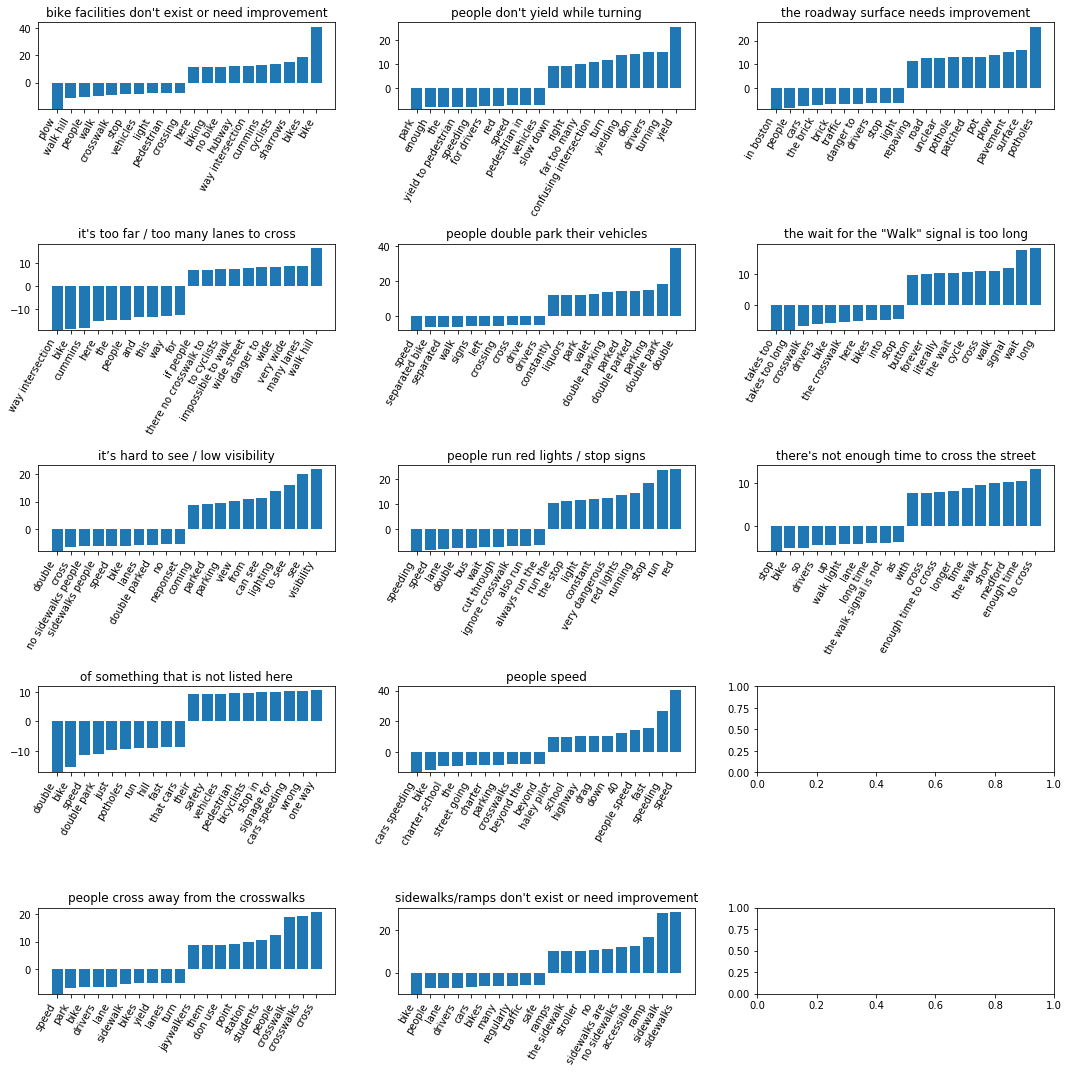

In [22]:
w = pipe.named_steps['logit'].coef_
#w.shape
features = pipe.named_steps['vect'].get_feature_names()
fig, axarr = plt.subplots(5,3, figsize=(15,15))
for i in range(w.shape[0]):
    plot_important_features(w[i,:].ravel(), np.array(features), top_n=10, ax=axarr[i%5,i/5])
    axarr[i%5,i/5].set_title(le.inverse_transform(i))
fig.tight_layout()

In [23]:
y_test_names = le.inverse_transform(y_test)
y_hat_names = le.inverse_transform(y_hat)
labels = le.inverse_transform(range(13))
conf = confusion_matrix(y_test_names, y_hat_names, labels)
labels, conf

(array(["bike facilities don't exist or need improvement",
        "it's too far / too many lanes to cross",
        'it’s hard to see / low visibility',
        'of something that is not listed here',
        'people cross away from the crosswalks',
        "people don't yield while turning",
        'people double park their vehicles',
        'people run red lights / stop signs', 'people speed',
        "sidewalks/ramps don't exist or need improvement",
        'the roadway surface needs improvement',
        'the wait for the "Walk" signal is too long',
        "there's not enough time to cross the street"], dtype=object),
 array([[166,   4,   3,  28,   1,   2,   2,   2,   8,   7,   5,   0,   0],
        [  1,   7,   1,   7,   2,   5,   0,   1,   1,   1,   0,   2,   0],
        [  2,   0,  65,  22,   0,   6,   1,   3,   5,   1,   0,   0,   0],
        [ 26,   2,  15, 199,  13,  27,  10,  26,  17,  17,   2,   2,   1],
        [  2,   3,   1,  13,  31,   7,   0,   1,   0,   3,   0,  

# Clustering 

To address the misc;assification problem, we decided to try and apply different clustering methods to define better classes for the dataset.
We applied LDA, NMF and K-Means to the whole dataset and tried to find clusters or topics that either match well with some of the ground truth labels or that we could make sense of.

In [27]:
####I split the data in 2 sets: one to find the clusters and one to retrain de model
X_cluster, X_val, y_cluster, y_val = train_test_split(X, y, stratify=y, test_size=.5)

# KMeans
The kmeans are going to be used to pick the number of clusters for more advanced clustering methods

In [88]:
##Kmeans with count vectorizer

#vect = CountVectorizer(ngram_range = (1,5), min_df=2)
#losses =[]
#for k in range(1,15):
#    kmeans = KMeans(n_clusters=k)
#    kmeans.fit(vect.fit_transform(X_cluster))
#    losses.append(kmeans.inertia_)

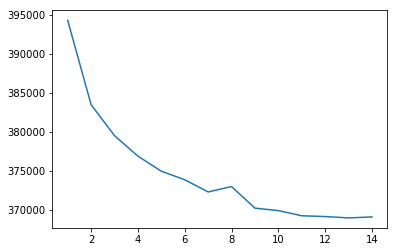

In [90]:
plt.plot(range(1,15), losses)

In [137]:
##Kmeans with tfidf vectorizer

#vect = CountVectorizer(ngram_range = (1,5), min_df=2)
#losses =[]
#for k in range(1,25):
#    kmeans = KMeans(n_clusters=k)
#    kmeans.fit(vect.fit_transform(X_cluster))
#    losses.append(kmeans.inertia_)

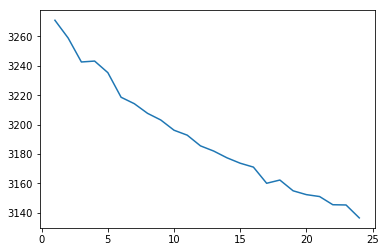

In [139]:
plt.plot(range(1,25), losses)

In [145]:
#We notice a knee for k=6 so that is the number of topics we are going to use for lda and nmf

# LDA
we fit the model and plot the important features. Then, we create a confusion matrix between the topics and the initial labels, assigning each document to it's most important topic, to see how well they match

In [162]:

vect_lda = CountVectorizer(ngram_range = (1,5), min_df=2, stop_words='english')
lda = LatentDirichletAllocation(n_topics=6)
lda.fit(vect_lda.fit_transform(X_cluster))

C:\Users\oser\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:508: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_jobs=1, n_topics=6, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [150]:
def plot_important_features_2(coef, feature_names, top_n=20, ax=None):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(coef)
    important = inds[-top_n:]
    myrange = range(len(important))

    ax.bar(myrange, coef[important])
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[important], rotation=60, ha="right")

C:\Users\oser\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\oser\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


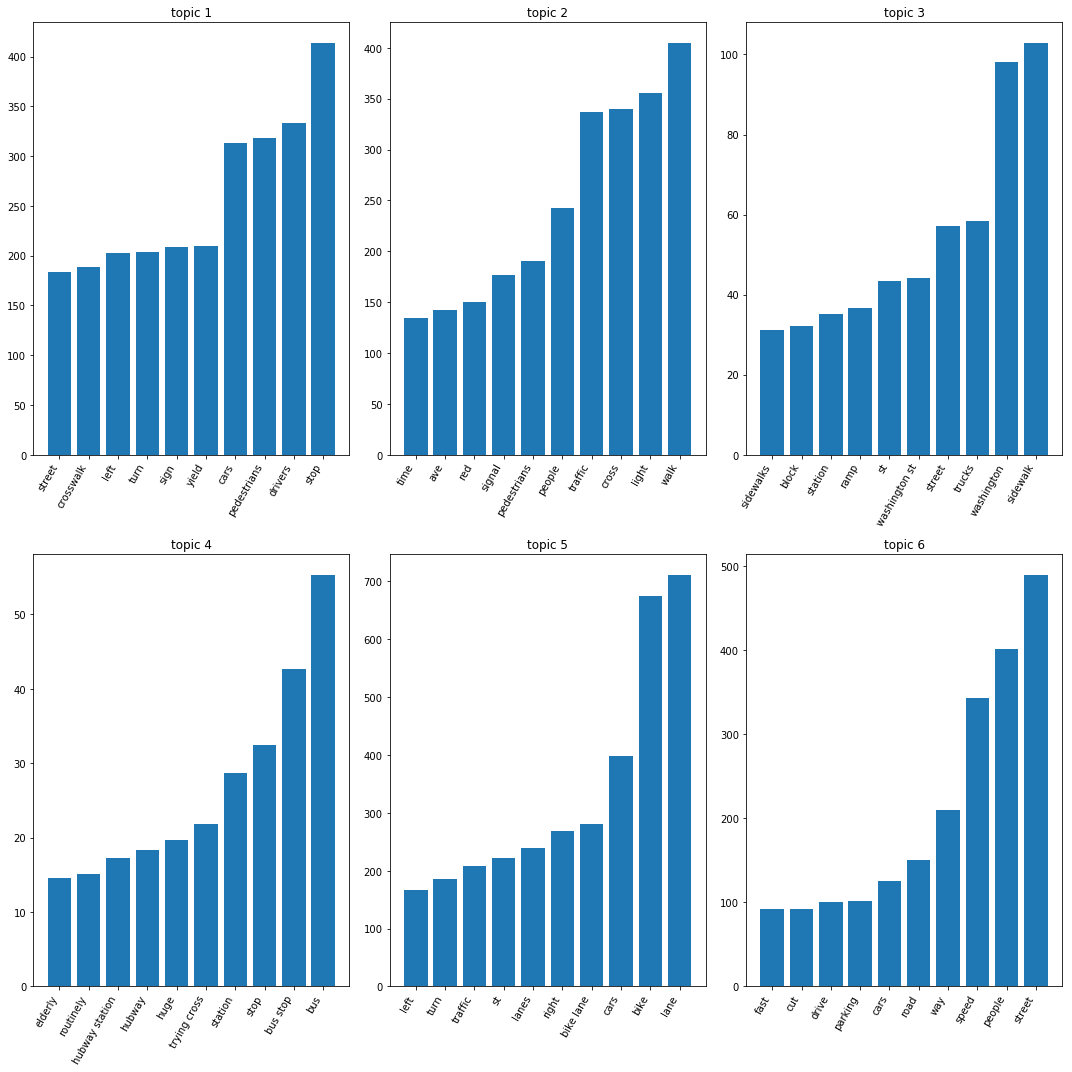

In [164]:
w = lda.components_
w.shape
features = vect_lda.get_feature_names()
fig, axarr = plt.subplots(2,3, figsize=(15,15))
for i in range(w.shape[0]):
    plot_important_features_2(w[i,:].ravel(), np.array(features), top_n=10, ax=axarr[i/3,i%3])
    axarr[i/3,i%3].set_title('topic %d' %(i+1))
fig.tight_layout()


In [165]:
#Contingency matrix between the original classes and the clusters
clusters_lda = np.argmax( lda.transform(vect_lda.fit_transform(X_cluster)), axis=1)
labels = le.inverse_transform(range(13))
#clusters
conf = confusion_matrix(y_cluster, clusters_lda)
labels, conf[:,:6]

(array(["bike facilities don't exist or need improvement",
        "it's too far / too many lanes to cross",
        'it’s hard to see / low visibility',
        'of something that is not listed here',
        'people cross away from the crosswalks',
        "people don't yield while turning",
        'people double park their vehicles',
        'people run red lights / stop signs', 'people speed',
        "sidewalks/ramps don't exist or need improvement",
        'the roadway surface needs improvement',
        'the wait for the "Walk" signal is too long',
        "there's not enough time to cross the street"], dtype=object),
 array([[ 21,  21,  16,  43, 323,  31],
        [ 10,  16,   5,   0,  16,   9],
        [ 45,  32,   9,   5,  90,  29],
        [179, 142,  36,  17, 200, 139],
        [ 20,  58,  13,   5,  11,  20],
        [176,  68,   4,   8,  72,  34],
        [ 12,  53,  26,   5,  86,  33],
        [178,  85,   5,  10,  23,  30],
        [ 62,  28,  15,   7,  52, 209],
     

# NMF
we fit the model and plot the important features. Then, we create a confusion matrix between the topics and the initial labels, assigning each document to it's most important topic, to see how well they match

In [166]:
nmf = NMF(n_components=6)
vect_nmf = CountVectorizer(ngram_range = (1,5), min_df=2, stop_words='english')
nmf.fit(vect_nmf.fit_transform(X_cluster))

NMF(alpha=0.0, beta=1, eta=0.1, init=None, l1_ratio=0.0, max_iter=200,
  n_components=6, nls_max_iter=2000, random_state=None, shuffle=False,
  solver='cd', sparseness=None, tol=0.0001, verbose=0)

C:\Users\oser\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\oser\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


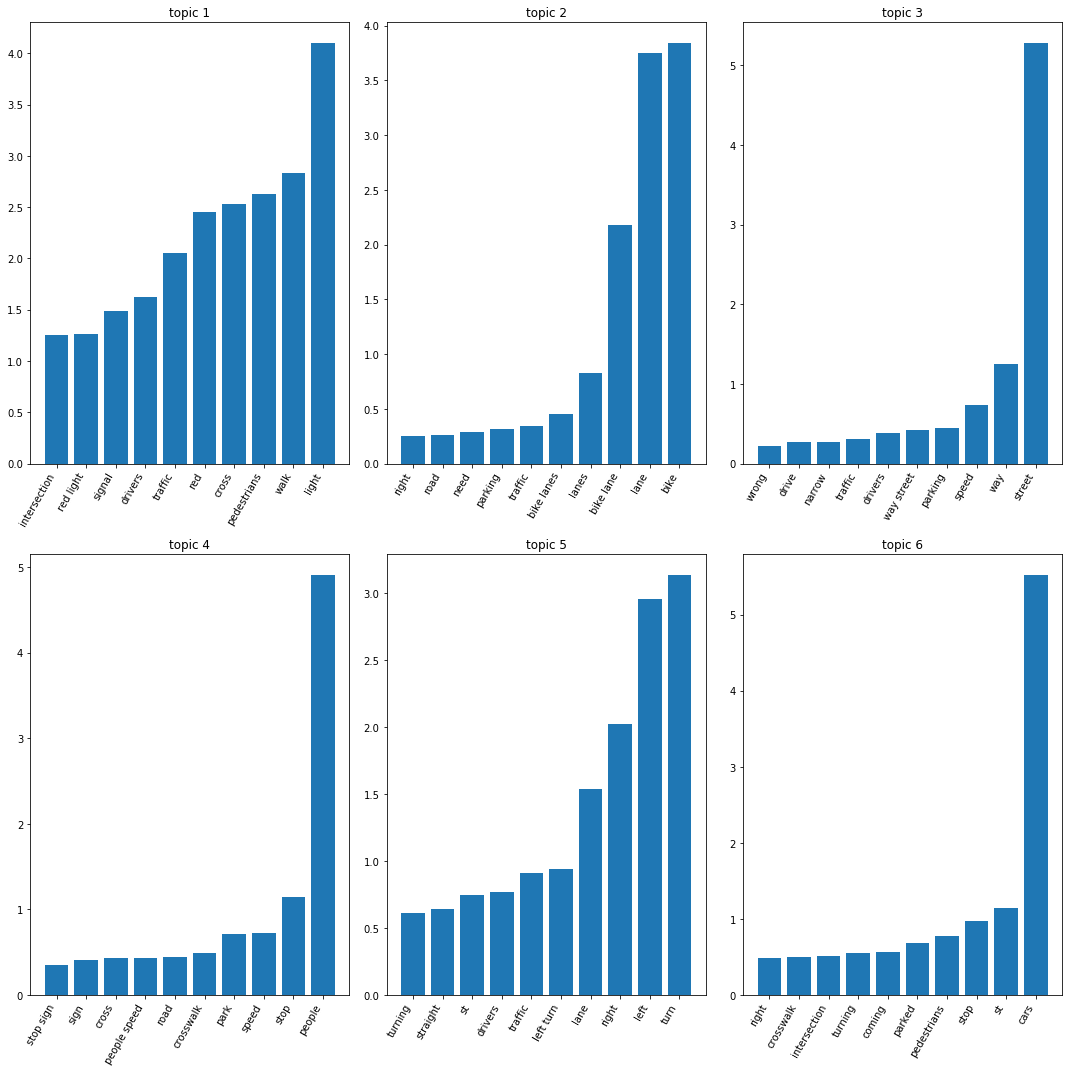

In [167]:
w = nmf.components_
w.shape
features = vect_nmf.get_feature_names()
fig, axarr = plt.subplots(2,3, figsize=(15,15))
for i in range(w.shape[0]):
    plot_important_features_2(w[i,:].ravel(), np.array(features), top_n=10, ax=axarr[i/3,i%3])
    axarr[i/3,i%3].set_title('topic %d' %(i+1))
fig.tight_layout()


In [170]:
#Contingency matrix between the original classes and the clusters
clusters_nmf = np.argmax( nmf.transform(vect_nmf.fit_transform(X_cluster)), axis=1)
labels = le.inverse_transform(range(13))
#clusters
conf = confusion_matrix(y_cluster, clusters_nmf)
labels, conf[:,:6]

(array(["bike facilities don't exist or need improvement",
        "it's too far / too many lanes to cross",
        'it’s hard to see / low visibility',
        'of something that is not listed here',
        'people cross away from the crosswalks',
        "people don't yield while turning",
        'people double park their vehicles',
        'people run red lights / stop signs', 'people speed',
        "sidewalks/ramps don't exist or need improvement",
        'the roadway surface needs improvement',
        'the wait for the "Walk" signal is too long',
        "there's not enough time to cross the street"], dtype=object),
 array([[ 13, 288,  37,  50,  34,  33],
        [ 13,   7,  11,  14,   4,   7],
        [ 20,  11,  40,  27,  30,  82],
        [128,  74, 134, 142, 144,  91],
        [ 30,   0,  17,  64,   5,  11],
        [ 78,  30,  32,  66,  69,  87],
        [  9,  67,  34,  61,   8,  36],
        [108,   4,  29,  89,  32,  69],
        [ 33,  20, 117, 131,  18,  54],
     

We can see that the topics retrieved by NMF are more semantically interpretables so those are the new classes we are going to define
I tried applying the topic modelling mthods to the data generated with a CountVectorizer and a TfidfVectorizer but the results were more semantically interpretable for the former
we can see that the different nmf topics correspond respectively to:
Topic 1: Pedestrians
Topic 2: Bikes
Topic 3: Streets
Topic 4: People behavior
Topic 5: Turns
Topic 6: cars

In [105]:
##Comparison between clusterings
adjusted_rand_score(clusters_lda, clusters_nmf)

0.046708558903864474

# Model 3 

We re-assigned labels using the results of clustering. We chos the most semantically meaningful.


In [196]:
y_new = np.argmax( lda.transform(vect_nmf.transform(X_val)), axis=1)
X_train_sub, X_test_sub, y_train_sub, y_test_sub = train_test_split(X_val, y_new)

vect = CountVectorizer(ngram_range = (1,5), min_df=2, stop_words='english')

tfidf = TfidfTransformer()
logit = LogisticRegression(C=C.mean(), class_weight='balanced')

pipe = Pipeline([ ('vect', vect),  ('logit', logit)])

pipe.fit(X_train_sub, y_train_sub)
y_hat = pipe.predict(X_test_sub)
score_val = f1_score(y_test_sub, y_hat, average='macro')


In [197]:
score_val
###We see an improvement in our f1_score

0.67979409466337204

# Cluster analysis with the class others

Given that the data has a large “other” category, we also went back and applied the topic modeling and clustering techniques to this subset of the data to find possible splits of this class.

In [132]:
#set(data_clean['REQUESTTYPE'])
other = int(le.transform(['of something that is not listed here']))
inds = [x for x in range(len(y_cluster)) if y_cluster[x] == other]
X_other = [X_cluster[x] for x in range(len(y_cluster)) if y_cluster[x] == other]
y_other = y_cluster[y_cluster == other]
X_other, inds


(["From here to get onto Storrow Drive, you have to 1. merge right onto the exit 26 road 2. merge right at the top after coming out of the tunnel 3. merge right again to avoid heading into the Gov't ctr exit only lane. In heavy traffic.",
  "People sell goods out of trashbags in front of Davy's and it's hard to walk on the sidewalk with a stroller",
  'Bicyclists ride on the sidewalk and make it very dangerous for pedestrians.',
  'So many car accidents here - road needs to be reconfigured - traffic lights!',
  'Lane alignment is poor',
  'Put stop sign here, no one yields to pedestrians in crosswalk. Need cone and sign re: $250 fine for not yielding to pedestrians already in crosswalk.  Near BPS headquarters,  many mothers with kids in strollers.',
  'People parking on both side of Cedar. Near collisions here on a daily basis.',
  'This intersection is a nightmare for anyone turning in any direction other than straight.',
  'Cars stop in bike lane',
  "People park illegally at the end

In [133]:
##Kmeans with Count Vectorizer

#vect = CountVectorizer(ngram_range = (1,5), min_df=2)
#losses =[]
#for k in range(1,15):
#    kmeans = KMeans(n_clusters=k)
#    kmeans.fit(vect.fit_transform(X_other))
#    losses.append(kmeans.inertia_)

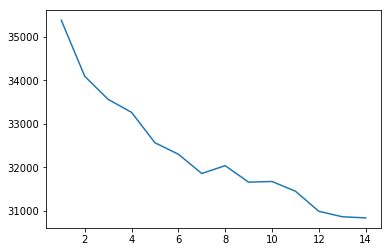

In [134]:
plt.plot(range(1,15), losses)

In [201]:
#NMF
nmf = NMF(n_components=7)
vect_nmf = CountVectorizer(ngram_range = (1,5), min_df=2, stop_words='english')
nmf.fit(vect_nmf.fit_transform(X_other))

NMF(alpha=0.0, beta=1, eta=0.1, init=None, l1_ratio=0.0, max_iter=200,
  n_components=7, nls_max_iter=2000, random_state=None, shuffle=False,
  solver='cd', sparseness=None, tol=0.0001, verbose=0)

C:\Users\oser\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
C:\Users\oser\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


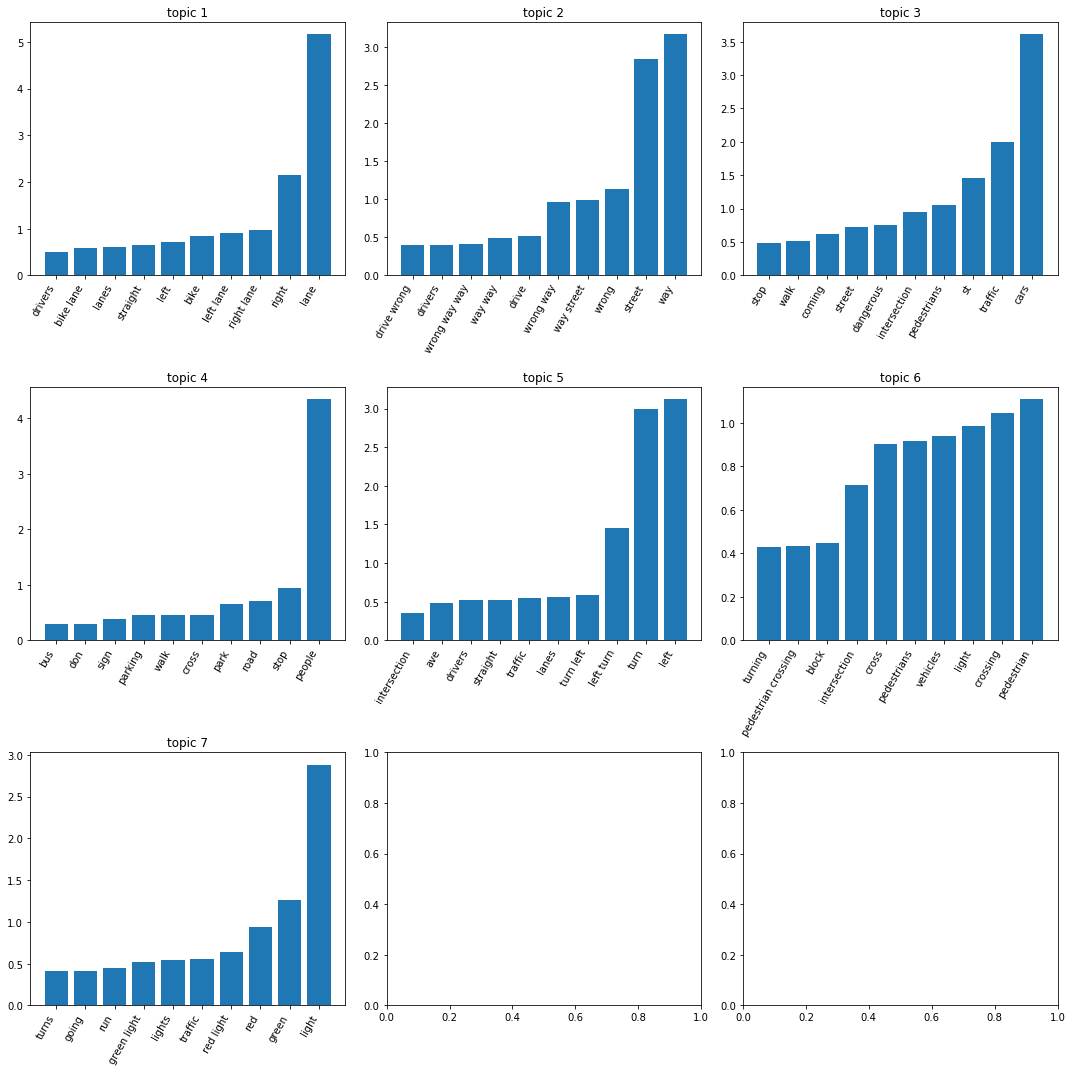

In [202]:
w = nmf.components_
w.shape
features = vect_nmf.get_feature_names()
fig, axarr = plt.subplots(3,3, figsize=(15,15))
for i in range(w.shape[0]):
    plot_important_features_2(w[i,:].ravel(), np.array(features), top_n=10, ax=axarr[i/3,i%3])
    axarr[i/3,i%3].set_title('topic %d' %(i+1))
fig.tight_layout()

In [ ]:
###It appears to me that the topics represented in the class other are semantically similar to the topics I got by 
#Doing topic modeling on the whole dataset so I am just going to keep those.


In [203]:
assert score_val > .65